## BUSINESS UNDERSTANDING
Airbus,wants to know Airplane crashes and fatalities occurences and causes in order to put in place prevention measures.As a data scientist I have been tasked to come up with various insights on the crashes hence helping Airbus to  put in place correct measures

## DATA UNDERSTANDING
The data was obtained from kaggle and it contains the following columns
- index,Date,Time,Location,Operator,Flight ,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
Date: Date of accident
Time: Local time, in 24 hr. in the format hh:mm

Location: Location of the accident

Operator: Airline or operator of the aircraft

Flight: Flight number assigned by the aircraft operator

Route: Complete or partial route flown prior to the accident

Type: Aircraft type

Registration: ICAO registration of the aircraft
cn/In: Construction or serial number / Line or fuselage number
Aboard: Total people aboard
Fatalities: Total people died

Ground: Total killed on the ground

Summary: Brief description of the accident and cause if known


In [878]:
#importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')


In [879]:
##loading our dataframe
df=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3562 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


The dataframe contains 14 columns, and  5267 entries

## DATA PREPARATION

In [880]:
##previewing our dataframe
df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [881]:
df.tail()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [882]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,5268.0,2633.500000,1520.884940,0.0,1316.75,2633.5,3950.25,5267.0
Aboard,5246.0,27.554518,43.076711,0.0,5.00,13.0,30.00,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.00,9.0,23.00,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.00,0.0,0.00,2750.0


In [883]:
df.dtypes

index             int64
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [884]:
#checking for missing values
df.isna().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [885]:
df.isna().sum()/len(df)*100

index            0.000000
Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

Flight# has the highest percentage of missing valuees,so we will drop it together with the index column

In [886]:
#dropping columns
df.drop(['index','Flight #'],axis=1,inplace=True)

In [887]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [888]:
#replacing missing values in objects with zero
df.fillna({'Time':0,'Location':'Unknown','Operator':'Unknown','Route':'Unknown',
            'Type':'Unknown','Registration':'Unknown','cn/In':0,'Summary':'Unknown'},
            inplace=True)

In [889]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,Unknown,0,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,0,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,Unknown,0,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),Unknown,0,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),Unknown,0,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [890]:
#filling missing values of numerical columns with their median
df['Aboard'].fillna(df['Aboard'].median(),inplace=True )
df['Fatalities'].fillna(df['Fatalities'].median(),inplace=True)
df['Ground'].fillna(df['Ground'].median(),inplace=True)


In [891]:
#checking if there is still any missing values
df.isna().sum()

Date            0
Time            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
cn/In           0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [892]:
#checking for duplicates
df.duplicated().sum()

0

## FEATURE ENGINEERING


In [893]:
#dropping columns that I won't be using
df.drop(['Route','Type','cn/In'],axis=1,inplace=True)

In [894]:
#converting floats into objects
df['Aboard']=df['Aboard'].astype(int)
df['Fatalities']=df['Fatalities'].astype(int)
df['Ground']=df['Ground'].astype(int)

In [895]:
#creating a new column called survivors
df['Survivors']=df['Aboard']-df['Fatalities']

In [896]:
#creating a new column of those who died on the air
df['Air']=df['Fatalities']-df['Ground']

In [897]:
#getting the survivall rate
df['survival_rate ']=df['Survivors']/df['Aboard']*100
df['Fatality_rate']=df['Fatalities']/df['Aboard']*100

In [898]:
#getting the year,month and day the crashes
df['Date'] = pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['month']=df['Date'].dt.month
df['monthname'] = df['Date'].dt.month_name(locale = 'English')
df['Day_Week'] = pd.DatetimeIndex(df['Date']).day_name()
df['date1']=df['month'].astype('str')+'/'+df['year'].astype('str')

In [899]:
# getting the season in which the crash occured
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
        
df['season']=df['month'].apply(get_season)

In [900]:
def get_weekend(Day_Week):
    if Day_Week != 'Sunday' and Day_Week !='Saturday':
        return 'weekday'
    else:
        return 'weekend'
df['day1']=df['Day_Week'].apply(get_weekend)

In [901]:
df

,Date,Time,Location,Operator,Registration,Aboard,Fatalities,Ground,Summary,Survivors,...,survival_rate,Fatality_rate,year,day,month,monthname,Day_Week,date1,season,day1
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown,2,1,0,"During a demonstration flight, a U.S. Army fly...",1,...,50.0,50.0,1908,17,9,September,Thursday,9/1908,autumn,weekday
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown,5,5,0,First U.S. dirigible Akron exploded just offsh...,0,...,0.0,100.0,1912,12,7,July,Friday,7/1912,summer,weekday
2,1913-08-06,0,"Victoria, British Columbia, Canada",Private,Unknown,1,1,0,The first fatal airplane accident in Canada oc...,0,...,0.0,100.0,1913,6,8,August,Wednesday,8/1913,summer,weekday
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Unknown,20,14,0,The airship flew into a thunderstorm and encou...,6,...,30.0,70.0,1913,9,9,September,Tuesday,9/1913,autumn,weekday
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,30,30,0,Hydrogen gas which was being vented was sucked...,0,...,0.0,100.0,1913,17,10,October,Friday,10/1913,autumn,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,A-1325,112,98,2,"While on approach, the military transport cras...",14,...,12.5,87.5,2009,20,5,May,Wednesday,5/2009,spring,weekday
5264,2009-05-26,0,"Near Isiro, DemocratiRepubliCongo",Service Air,9Q-CSA,4,4,0,The cargo plane crashed while on approach to I...,0,...,0.0,100.0,2009,26,5,May,Tuesday,5/2009,spring,weekday
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,F-GZCP,228,228,0,The Airbus went missing over the AtlantiOcean ...,0,...,0.0,100.0,2009,1,6,June,Monday,6/2009,summer,weekday
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,C-FJJR,1,1,0,The air ambulance crashed into hills while att...,0,...,0.0,100.0,2009,7,6,June,Sunday,6/2009,summer,weekend


In [902]:
 #new data frame with split value columns and getting the country
df['Country']  = df['Location'].str.split(',').str[-1].str.strip().str.upper()



In [903]:
df.head()

,Date,Time,Location,Operator,Registration,Aboard,Fatalities,Ground,Summary,Survivors,...,Fatality_rate,year,day,month,monthname,Day_Week,date1,season,day1,Country
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown,2,1,0,"During a demonstration flight, a U.S. Army fly...",1,...,50.0,1908,17,9,September,Thursday,9/1908,autumn,weekday,VIRGINIA
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown,5,5,0,First U.S. dirigible Akron exploded just offsh...,0,...,100.0,1912,12,7,July,Friday,7/1912,summer,weekday,NEW JERSEY
2,1913-08-06,0,"Victoria, British Columbia, Canada",Private,Unknown,1,1,0,The first fatal airplane accident in Canada oc...,0,...,100.0,1913,6,8,August,Wednesday,8/1913,summer,weekday,CANADA
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Unknown,20,14,0,The airship flew into a thunderstorm and encou...,6,...,70.0,1913,9,9,September,Tuesday,9/1913,autumn,weekday,OVER THE NORTH SEA
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,30,30,0,Hydrogen gas which was being vented was sucked...,0,...,100.0,1913,17,10,October,Friday,10/1913,autumn,weekday,GERMANY


In [904]:
df['decade']= (df['year']) // 10 * 10
decade.value_counts()

1970    837
1990    775
1960    721
1980    717
1950    596
2000    583
1940    510
1930    323
1920    178
1910     27
1900      1
Name: year, dtype: int64

#   EXPLATORY DATA ANALYSIS

### Which decade had the most airplane crashes ?



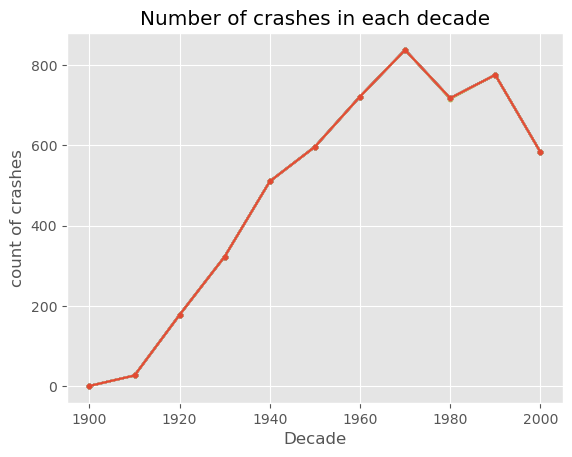

In [905]:

decade_count=df.groupby(df['decade']).count()
plt.plot(decade_count.index,decade_count,marker='.')
plt.title('Number of crashes in each decade')
plt.xlabel('Decade')
plt.ylabel('count of crashes')
plt.show()


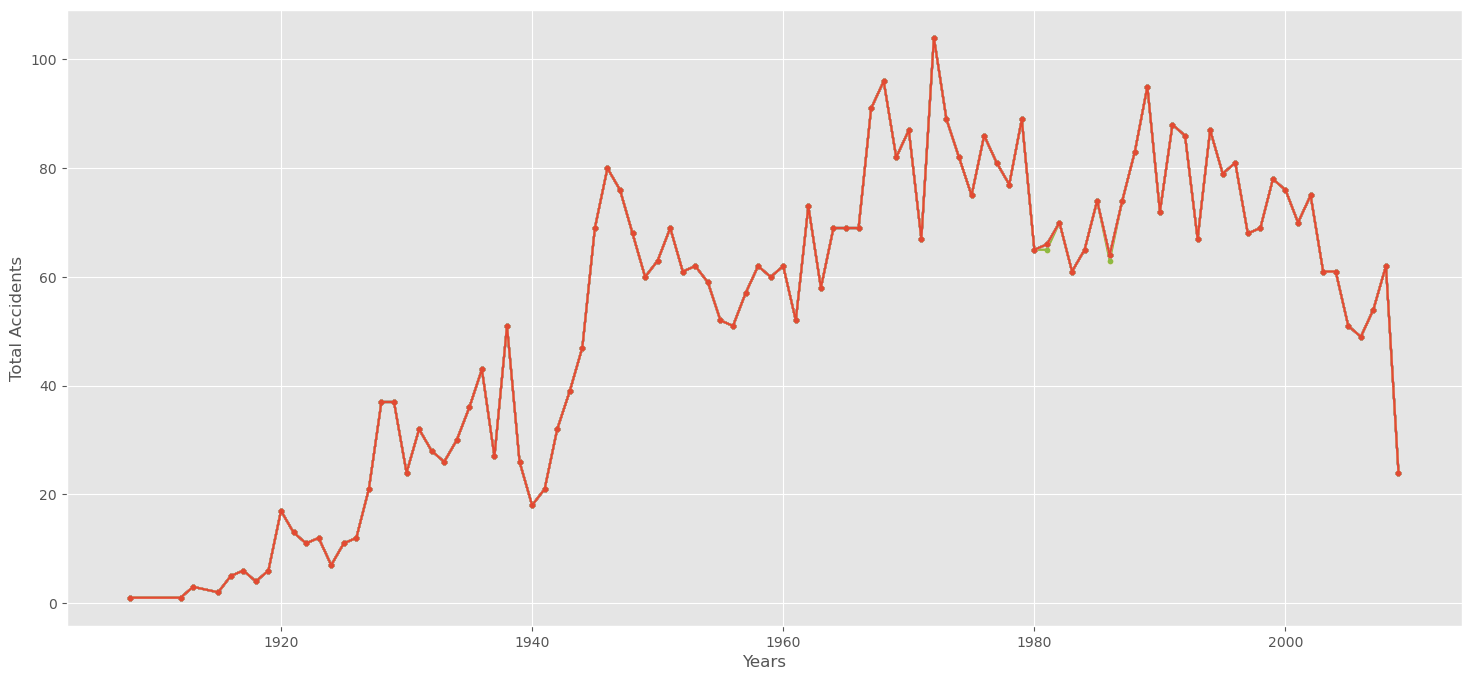

In [906]:
year_count = df.groupby(df['year']).count()

plt.figure(figsize= (18, 8))
plt.plot(year_count.index, year_count, marker= '.')

plt.xlabel('Years')
plt.ylabel('Total Accidents')
plt.show()

Around 1970s alot of crashes occured

### Which month had the highest number of crashes ?

Text(0, 0.5, 'Months')

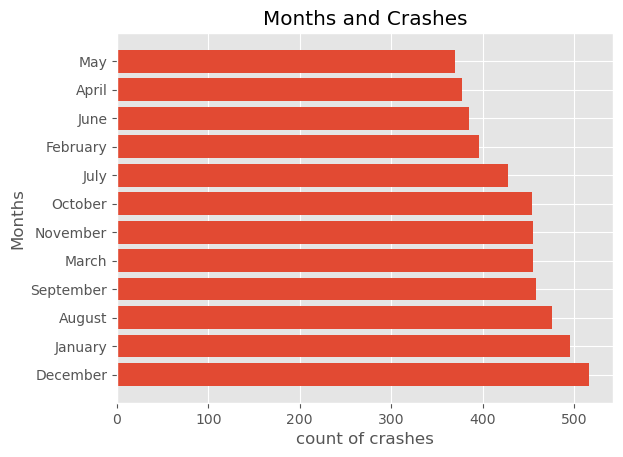

In [907]:
month_count=df.monthname.value_counts()
x=month_count.index
y=month_count.values
plt.barh(x,y)
plt.title('Months and Crashes')
plt.xlabel('count of crashes')
plt.ylabel('Months')

December,January and August recorded a high number of crashes,but there is less difference among the crashes occured across other months

### How do crashes occurence vary across seaons ?

Text(0, 0.5, 'Count of crashes')

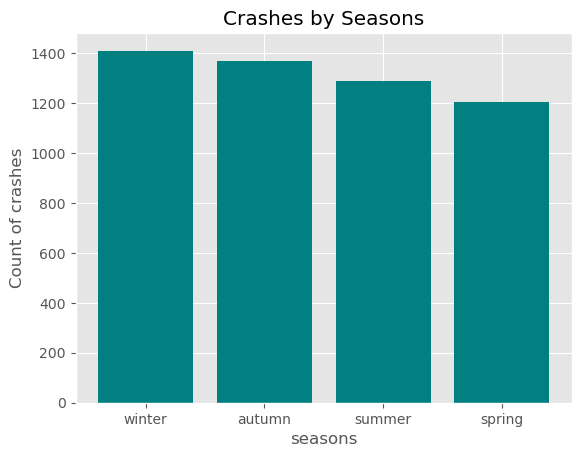

In [908]:

season_count=df['season'].value_counts()
plt.bar(season_count.index,season_count,color='Teal')
plt.title('Crashes by Seasons')
plt.xlabel('seasons')
plt.ylabel('Count of crashes')

Winter had the highest amount of crashes, this can be due to the poor visibility and poor weather .

###  WHEN DID CRASHES OCCUR, IS IT WEEKDAYS OR WEEKENDS?

In [909]:
df.head()

,Date,Time,Location,Operator,Registration,Aboard,Fatalities,Ground,Summary,Survivors,...,year,day,month,monthname,Day_Week,date1,season,day1,Country,decade
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown,2,1,0,"During a demonstration flight, a U.S. Army fly...",1,...,1908,17,9,September,Thursday,9/1908,autumn,weekday,VIRGINIA,1900
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown,5,5,0,First U.S. dirigible Akron exploded just offsh...,0,...,1912,12,7,July,Friday,7/1912,summer,weekday,NEW JERSEY,1910
2,1913-08-06,0,"Victoria, British Columbia, Canada",Private,Unknown,1,1,0,The first fatal airplane accident in Canada oc...,0,...,1913,6,8,August,Wednesday,8/1913,summer,weekday,CANADA,1910
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Unknown,20,14,0,The airship flew into a thunderstorm and encou...,6,...,1913,9,9,September,Tuesday,9/1913,autumn,weekday,OVER THE NORTH SEA,1910
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,30,30,0,Hydrogen gas which was being vented was sucked...,0,...,1913,17,10,October,Friday,10/1913,autumn,weekday,GERMANY,1910


Text(0.5, 1.0, 'Weekday/Weekends')

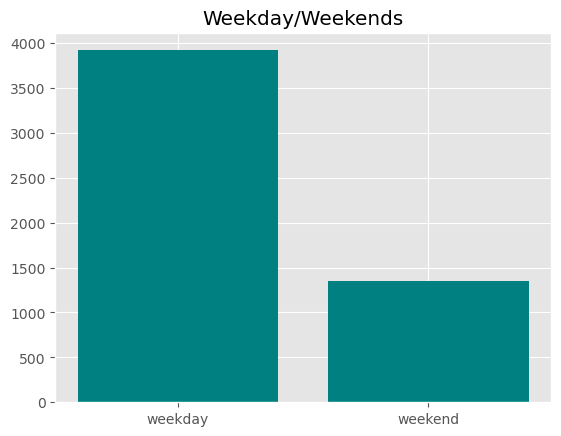

In [910]:
dayweek_count=df['day1'].value_counts()
plt.bar(dayweek_count.index,dayweek_count,color='Teal')
plt.title('Weekday/Weekends')

Most crashes occur during the weekdays

### Crashes across countries

Text(0, 0.5, 'Countries')

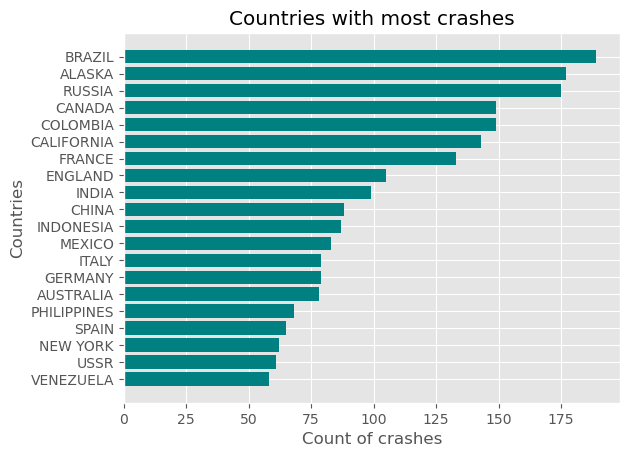

In [912]:
countries_count=df['Country'].value_counts().head(20).sort_values()
plt.barh(countries_count.index,countries_count,color='Teal')
plt.title('Countries with most crashes')
plt.xlabel('Count of crashes')
plt.ylabel('Countries')

We can see that brazil has a high number of crashes,followed by Alaska and Canada


SyntaxError: unmatched ')' (687023194.py, line 1)